Business questions and concerns to answer with EDA: 

Are there any problems with the data? 
    Are there Null values? 
    Are there outliers? 
    Is the data sufficient? Sufficient for what kind of analysis?

Is the chemical composition of red and white wines comparable?

Does the chemical composition have any impact on the perceived quality of the wine? 
What are your observations? 


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [45]:
### Datasets ###

red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')



In [46]:
##### Feature Engineering #####

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'


# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['wine_type'] = 'white'

## Exploratory Data Analysis ## 

In [47]:
## Data to Explore ##

wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

#wines.tail()

Text(0.5, 1.0, 'Wines')

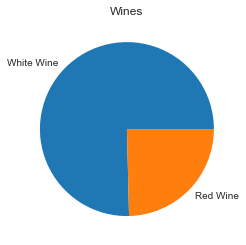

In [48]:
plt.pie(x=[white_wine.shape[0],red_wine.shape[0]], labels=['White Wine', 'Red Wine']);
plt.savefig('wines_count.png', facecolor='w')
plt.title('Wines')

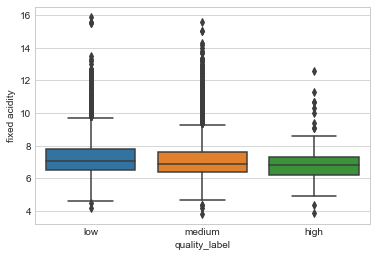

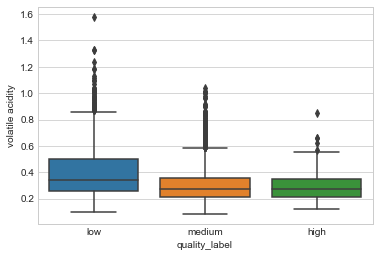

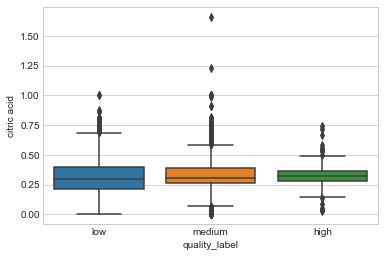

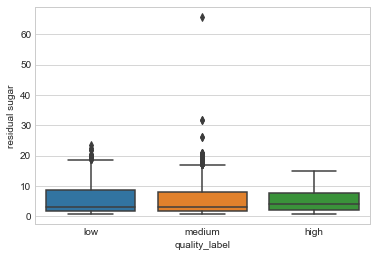

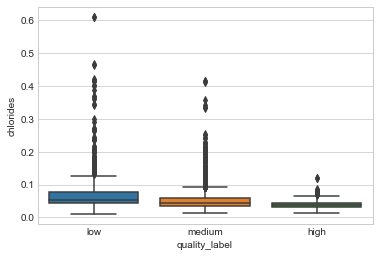

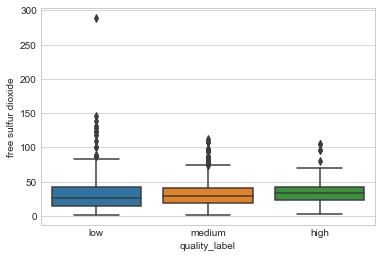

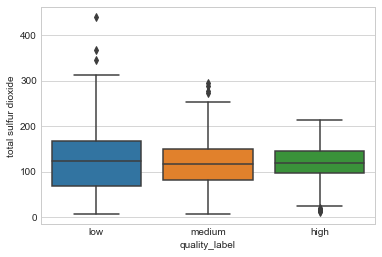

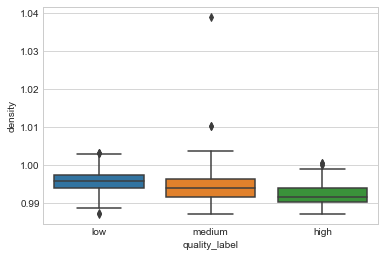

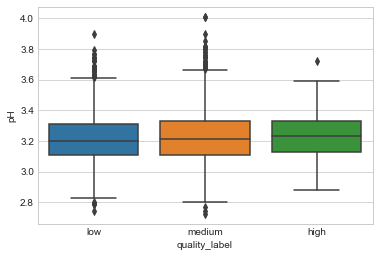

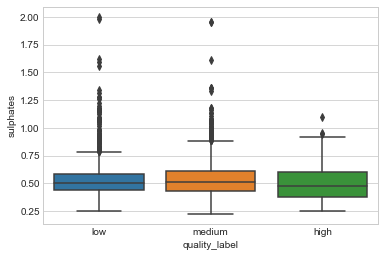

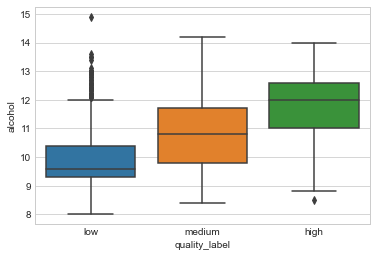

In [49]:

## Explore the following: 
# 1. Does a feature differ across the quality labels? (show boxplots)
# 2. Show relationship between a feature and a quality label (scatter plots)

# 1. 
features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        sns.boxplot(x=wines['quality_label'],y=wines[feature])

        #sns.barplot(ax=axs[1],x=wines['quality_label'], y=wines[feature])
        

        #sns.scatterplot(ax=axs[2],x=wines['quality_label'], y = wines[feature],hue=wines['quality_label'])
        
        plt.show()    


# 2. 

### Only alcohol appears to be differing significantly across different quality labels of wine, with high quality wine having the maximum alcohol content. The other features representing the physiochemical properties of wine, did not show any significant pattern across the different qualitiy labels of wine. However,....

### We have only analysed the relationship between one feature and the label. We still need to analyse the relationship between the label and the WHOLE feature set. For this we can use linear regression. 

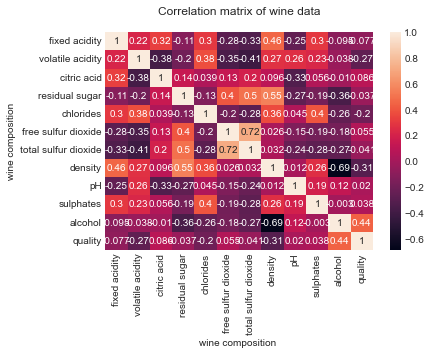

In [50]:
hm = sns.heatmap(wines.corr(), annot = True)
hm.set(xlabel='wine composition ', ylabel='wine composition', title = "Correlation matrix of wine data\n")
plt.show()


#### There is a lot of negative correlation. Let's try to explore this further with linear regression. 

In [51]:
# from sklearn import linear_model, metrics

# # defining feature matrix(X) and response vector(y)
# X = wines.select_dtypes(include=['float64'])
# y = wines['quality']

# # splitting X and y into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
#                                                     random_state=1)

# # create linear regression object
# reg = linear_model.LinearRegression()

# # train the model using the training sets
# reg.fit(X_train, y_train)

# # regression coefficients
# print('Coefficients: ', reg.coef_)
 
# # variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_test, y_test)))




In [54]:
from scipy import stats
import scipy.stats

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['density'],
wines[wines['quality_label'] == 'medium']['density'],
wines[wines['quality_label'] == 'high']['density'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

## How to interpret results to determine if the results are statistically significant?
# Compute F critical value and compare it with the F statistic. 

print('Critical Value: ', scipy.stats.f.ppf(q=0.05,dfn=2,dfd=6494))

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 287.59012617401197 	p-value: 2.1186713255495357e-120
Critical Value:  0.0512936995332142


In [ ]:

# Univariate Analysis # 

features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        fig = plt.figure()
        fig.set_size_inches(10,7)
        wines[feature].plot.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0)
        plt.xlabel(feature)
        
        plt.show()    
